In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_curve, roc_auc_score
)

In [12]:
# Load the dataset
df = pd.read_csv("covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [13]:
df.rename(columns={'Cured': 'Recovered'}, inplace=True)

<ipython-input-14-278c372c4098>:1: UserWarning:

Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



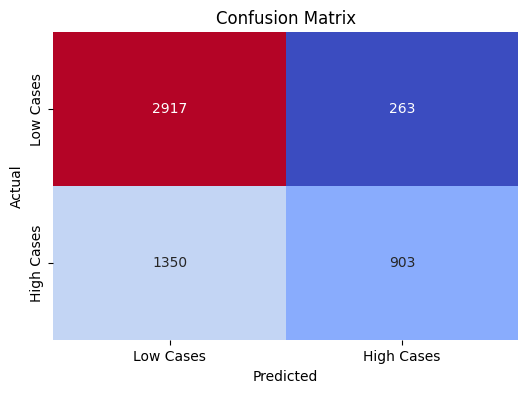


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78      3180
           1       0.77      0.40      0.53      2253

    accuracy                           0.70      5433
   macro avg       0.73      0.66      0.66      5433
weighted avg       0.72      0.70      0.68      5433



Accuracy: 0.703110620283453
Precision: 0.774442538593482
Recall: 0.4007989347536618
F1 Score: 0.5282246270839427
AUC Score: 0.8498389987354388

Cross-Validation Scores: [0.59884042 0.70844837 0.69850911 0.72418553 0.77250138]
Mean CV Accuracy: 0.7004969630038653


In [14]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)
df['Daily Confirmed'] = df['Confirmed'].diff().fillna(0)
df['High_Cases'] = df['Daily Confirmed'].apply(lambda x: 1 if x > 5000 else 0)

features = ['Recovered', 'Deaths']
df.dropna(subset=features + ['High_Cases'], inplace=True)
X = df[features]
y = df['High_Cases']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Low Cases', 'High Cases'],
            yticklabels=['Low Cases', 'High Cases'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve with Plotly
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guess', line=dict(dash='dash')))
fig.update_layout(
    title=f'ROC Curve (AUC = {auc_score:.2f})',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark',
    width=700,
    height=500
)
fig.show()

# Metrics Overview
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", auc_score)

# Cross Validation Accuracy
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Confusion Matrix:

A 2x2 table that breaks down predictions into True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). It gives a complete picture of how well the model classifies each class.

Accuracy:

Accuracy is the proportion of correctly predicted instances (TP + TN) out of all predictions. It gives an overall sense of model performance but can be misleading on imbalanced datasets.

Precision:

Precision = TP / (TP + FP). It measures how many of the positively predicted instances are actually positive. High precision means fewer false positives.

Recall (Sensitivity):

Recall = TP / (TP + FN). It measures how many actual positives the model correctly identified. High recall means fewer false negatives.

F1 Score:

The F1 Score is the harmonic mean of precision and recall. It balances both metrics and is especially useful when the dataset is imbalanced.

ROC Curve:

The Receiver Operating Characteristic (ROC) curve plots True Positive Rate vs. False Positive Rate at different thresholds. It shows the trade-off between sensitivity and specificity.

AUC (Area Under the Curve):

AUC represents the area under the ROC curve. A value closer to 1 indicates a better performing model, while 0.5 suggests random guessing.

Cross-Validation:

This technique splits the dataset into multiple folds to train and test the model on different parts. It gives a more robust and generalized estimate of model performance.